In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 1553768847-housing.csv.zip to 1553768847-housing.csv.zip


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import zipfile
import os

zip_file_name = "1553768847-housing.csv.zip"
csv_file_name_in_zip = "1553768847-housing.csv" # Name of the CSV file inside the zip

# Extract the zip file
if os.path.exists(zip_file_name):
    with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
        zip_ref.extractall('.') # Extract to the current directory
    print(f"'{zip_file_name}' extracted successfully.")

    # Read the extracted CSV file
    if os.path.exists(csv_file_name_in_zip):
        df = pd.read_csv(csv_file_name_in_zip)
        print("DataFrame loaded successfully:")
        print(df.head())
    else:
        print(f"Error: The expected CSV file '{csv_file_name_in_zip}' was not found after extraction.")
        print(f"Files in current directory: {os.listdir()}")
else:
    print(f"Error: The zip file '{zip_file_name}' was not found. Please ensure it is uploaded correctly.")

'1553768847-housing.csv.zip' extracted successfully.
DataFrame loaded successfully:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income ocean_proximity  median_house_value  
0         322         126         8.3252        NEAR BAY              452600  
1        2401        1138         8.3014        NEAR BAY              358500  
2         496         177         7.2574        NEAR BAY              352100  
3         558         219         5.6431        NEAR BAY              341300  
4         565         259         3.8462        NEAR BAY              

In [ ]:
df.shape

(20640, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
ocean_proximity,0
median_house_value,0


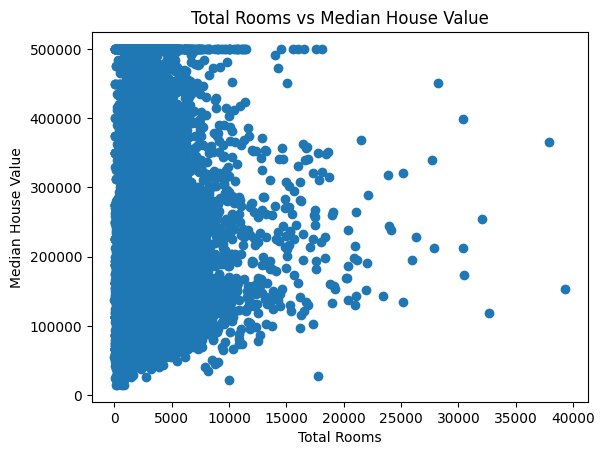

In [ ]:
plt.scatter(df["total_rooms"], df["median_house_value"])
plt.xlabel("Total Rooms")
plt.ylabel("Median House Value")
plt.title("Total Rooms vs Median House Value")
plt.show()

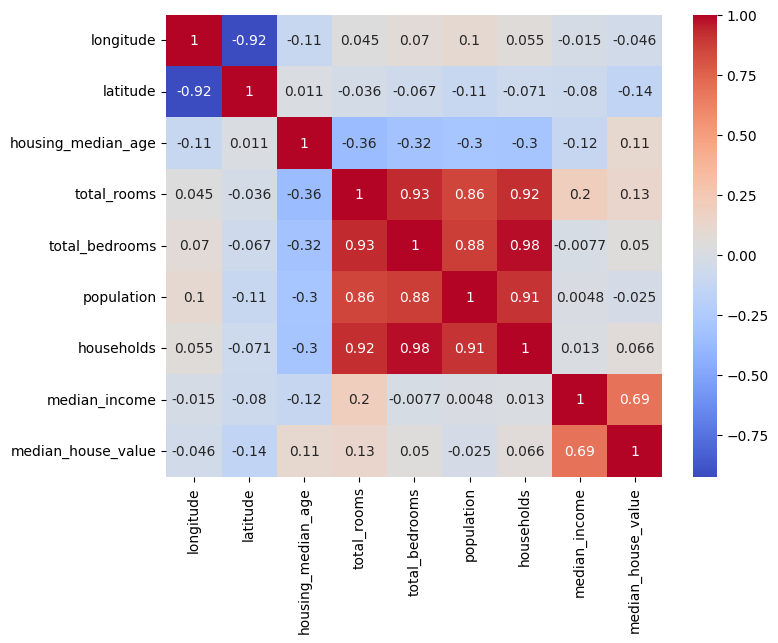

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

In [ ]:
df.fillna(df.mean(numeric_only=True), inplace=True)

In [ ]:
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
categorical_features = ["Location"]
numeric_features = ["Area", "Bedrooms", "Bathrooms"]

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first"), categorical_features)
    ],
    remainder="passthrough"
)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Correctly identify categorical features
categorical_features = ["ocean_proximity"]

# Re-create the preprocessor with the correct categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown='ignore'), categorical_features)
    ],
    remainder="passthrough"
)

# Apply the transformation
X = preprocessor.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 50701.77903133342
RMSE: 70031.41991955595
R2 Score: 0.6257351821159778


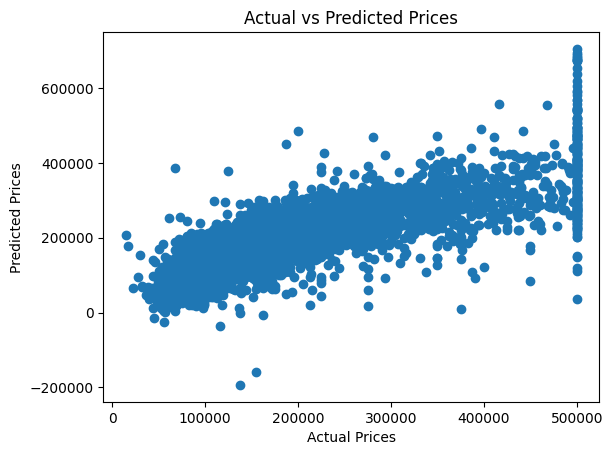

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

In [ ]:
# The 'new_house' DataFrame must have the same columns as the features (X) used for training.
# Based on the original DataFrame structure, these columns are:
# longitude, latitude, housing_median_age, total_rooms, total_bedrooms,
# population, households, median_income, ocean_proximity

# Example values for a new house, replace these with your desired input
new_house = pd.DataFrame({
    "longitude": [-122.23],
    "latitude": [37.88],
    "housing_median_age": [40],
    "total_rooms": [2500],
    "total_bedrooms": [450],
    "population": [1200],
    "households": [400],
    "median_income": [6.5],
    "ocean_proximity": ["NEAR BAY"]
})

new_house_transformed = preprocessor.transform(new_house)
predicted_price = model.predict(new_house_transformed)

print("Predicted House Price:", predicted_price[0])

Predicted House Price: 340380.2738975892
